# Project 1: Collecting and Analyzing Data

## Importing the necessary libraries

In [474]:
import os
import csv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [475]:
# Reading the dataset
data = pd.read_csv("/Users/mahvashmaghrabi/Desktop/CS6140_Project1/Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [476]:
# Renaming column names
data.rename(columns= {'Length1':'VerticalLen', 'Length2':'DiagonalLen', 'Length3':'CrossLen'}, inplace=True)
data.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Data Visualization

In [477]:
# Checking the count of different species
speciesCount = data['Species'].value_counts()
speciesCount = pd.DataFrame(speciesCount)
speciesCount

,Species
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


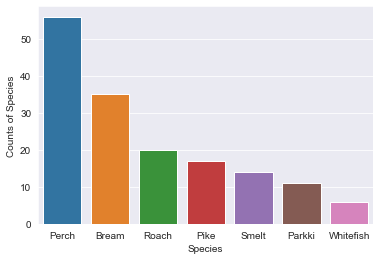

In [478]:
# Plotting the count of species on a barchart
sns.barplot(x=speciesCount.index, y=speciesCount['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

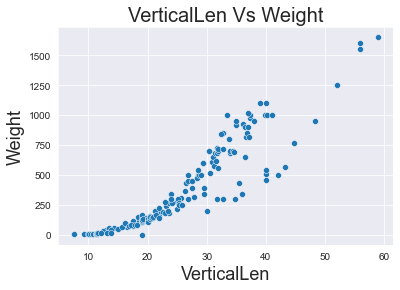

In [479]:
# Plotting the independent variable "VerticalLength" against the dependent variable "Weight" on a scatterchart
sns.set_style('darkgrid')
sns.scatterplot(y= data['Weight'], x= data['VerticalLen'])
plt.title('VerticalLen Vs Weight',size=20)
plt.ylabel('Weight', size=18)
plt.xlabel('VerticalLen', size=18)
plt.show()

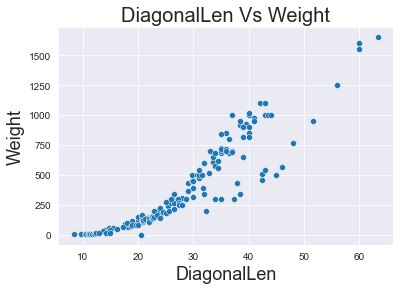

In [480]:
# Plotting the independent variable "DiagonalLength" against the dependent variable "Weight" on a scatterchart
sns.set_style('darkgrid')
sns.scatterplot(y= data['Weight'], x= data['DiagonalLen'])
plt.title('DiagonalLen Vs Weight',size=20)
plt.ylabel('Weight', size=18)
plt.xlabel('DiagonalLen', size=18)
plt.show()

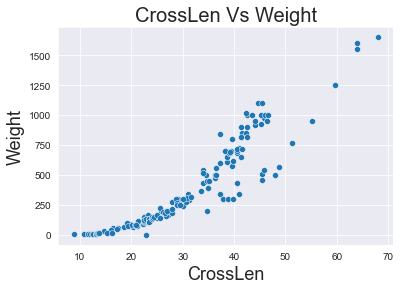

In [481]:
# Plotting the independent variable "CrossLength" against the dependent variable "Weight" on a scatterchart
sns.set_style('darkgrid')
sns.scatterplot(y= data['Weight'], x= data['CrossLen'])
plt.title('CrossLen Vs Weight',size=20)
plt.ylabel('Weight', size=18)
plt.xlabel('CrossLen', size=18)
plt.show()

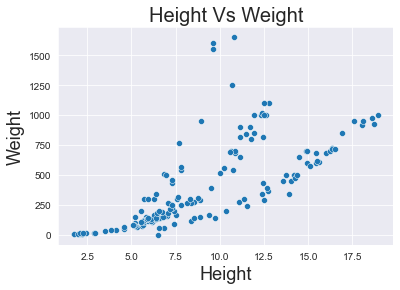

In [482]:
# Plotting the independent variable "Height" against the dependent variable "Weight" on a scatterchart
sns.set_style('darkgrid')
sns.scatterplot(y= data['Weight'], x= data['Height'])
plt.title('Height Vs Weight',size=20)
plt.ylabel('Weight', size=18)
plt.xlabel('Height', size=18)
plt.show()

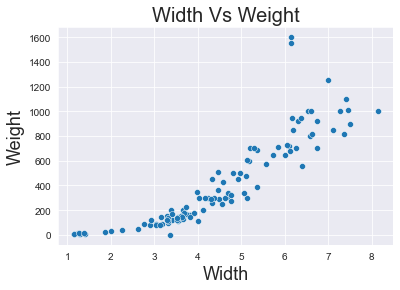

In [483]:
# Plotting the independent variable "Width" against the dependent variable "Weight" on a scatterchart
sns.set_style('darkgrid')
sns.scatterplot(y= training_set['Weight'], x= training_set['Width'])
plt.title('Width Vs Weight',size=20)
plt.ylabel('Weight', size=18)
plt.xlabel('Width', size=18)
plt.show()

# Data Cleaning

In [484]:
# Checking and removing the null values
data.isnull().values.any()

False

In [485]:
# Data description
data.describe()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


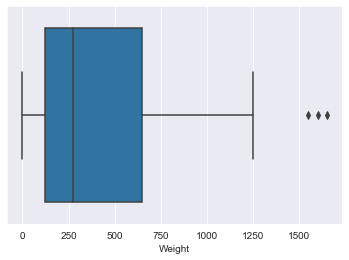

In [486]:
# Removing outliers
sns.boxplot(x=data['Weight']);

In [487]:
# IQR method to remove outliers in weight column
wt = data['Weight']
wt_q1 = wt.quantile(0.25)
wt_q3 = wt.quantile(0.75)
wt_iqr = wt_q3 - wt_q1
lower_limit = wt_q1 - (1.5 * wt_iqr)
upper_limit = wt_q3 + (1.5 * wt_iqr)

In [488]:
wt_iqr, lower_limit, upper_limit

(530.0, -675.0, 1445.0)

In [489]:
# Checking the outliers
wt_outliers = wt[(wt < lower_limit) | (wt > upper_limit)]
wt_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

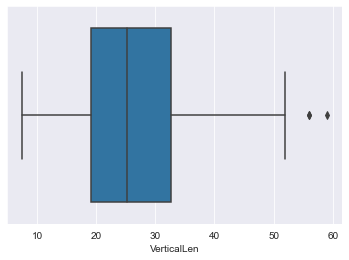

In [490]:
# Plotting on box-plot
sns.boxplot(x=data['VerticalLen']);

In [491]:
# IQR method to remove outliers in verticalLen column
vl = data['VerticalLen']
vl_q1 = vl.quantile(0.25)
vl_q3 = vl.quantile(0.75)
vl_iqr = vl_q3 - vl_q1
lower_limit = vl_q1 - (1.5 * vl_iqr)
upper_limit = vl_q3 + (1.5 * vl_iqr)

In [492]:
# Checking the outliers
vl_outliers = vl[(vl < lower_limit) | (vl > upper_limit)]
vl_outliers

142    56.0
143    56.0
144    59.0
Name: VerticalLen, dtype: float64

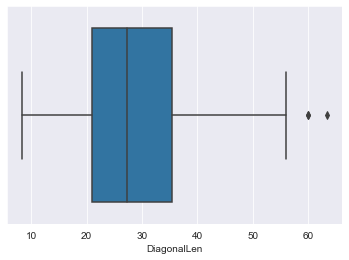

In [493]:
# Plotting on box-plot
sns.boxplot(x=data['DiagonalLen']);

In [494]:
# IQR method to remove outliers in diagonalLen column
dl = data['DiagonalLen']
dl_q1 = dl.quantile(0.25)
dl_q3 = dl.quantile(0.75)
dl_iqr = dl_q3 - dl_q1
lower_limit = dl_q1 - (1.5 * dl_iqr)
upper_limit = dl_q3 + (1.5 * dl_iqr)

In [495]:
# Checking the outliers
dl_outliers = dl[(dl < lower_limit) | (dl > upper_limit)]
dl_outliers

142    60.0
143    60.0
144    63.4
Name: DiagonalLen, dtype: float64

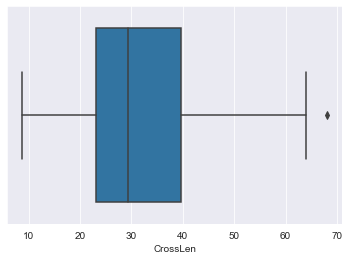

In [496]:
# Plotting on box-plot
sns.boxplot(x=data['CrossLen']);

In [497]:
# IQR method to remove outliers in crossLen column
cl = data['CrossLen']
cl_q1 = cl.quantile(0.25)
cl_q3 = cl.quantile(0.75)
cl_iqr = cl_q3 - dl_q1
lower_limit = cl_q1 - (1.5 * cl_iqr)
upper_limit = cl_q3 + (1.5 * cl_iqr)

In [498]:
# Checking the outliers
cl_outliers = cl[(cl < lower_limit) | (cl > upper_limit)]
cl_outliers

144    68.0
Name: CrossLen, dtype: float64

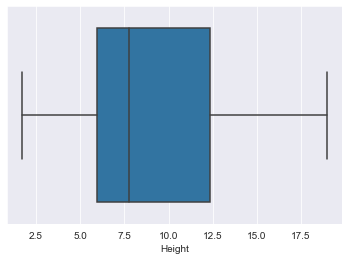

In [499]:
# Plotting on box-plot
sns.boxplot(x=data['Height']);

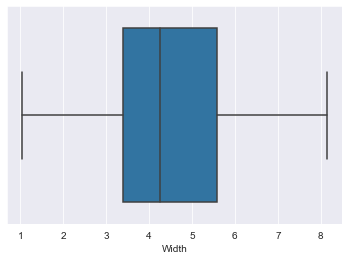

In [500]:
# Plotting on box-plot
sns.boxplot(x=data['Width']);

In [501]:
# Dropping the outliers and checking the new dataset
new_data = data.drop([142,143,144])
new_data.describe()

,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000


In [502]:
# Printing the new dataset
new_data

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Organizing the data

In [519]:
# Function to split the dataset into training and testing sets
def divide_data(new_data):

    train_pc = 0.7
    test_pc = 1 - train_pc
# Number of rows in the dataset
    n = len(new_data)
    
# Number of rows for the train set
    training_set = int(n * train_pc)
    
# Shuffle the data for a random split
    new_data = new_data.sample(frac=1)
    
# Splitting the data into train and test sets
    train_data = new_data[:training_set]
    test_data = new_data[training_set:]
    
# Writing the train data to a CSV file
    train_data.to_csv('train.csv', index = False, header=True)
    
# Writing the test data to a CSV file
    test_data.to_csv('test.csv', index = False, header=True)

# Printing the percentage of split and number of samples and file names
    print("Train percentage: {:.2f}%".format(train_pc*100))
    print("Number of samples in training set: {}".format(training_set))
    print("Test percentage: {:.2f}%".format(test_pc*100))
    print("Number of samples in testing set: {}".format(n - training_set))
    print("Test set file name: test.csv")
    print("Train set file name: train.csv")

# Calling the function
split_csv(new_data)

Train percentage: 70.00%
Number of samples in train set: 109
Test percentage: 30.00%
Number of samples in test set: 47
Test set file name: test.csv
Train set file name: train.csv


In [520]:
# Checking if the training file exists on the operating system
os.path.exists("train.csv")

True

In [521]:
# Checking if the testing file exists on the operating system
os.path.exists("test.csv")

True

In [522]:
# Reading the training file
pd.read_csv("train.csv")

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
1,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
2,Roach,272.0,25.0,27.0,30.6,8.5680,4.7736
3,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854
...,...,...,...,...,...,...,...
104,Bream,500.0,29.1,31.5,36.4,13.7592,4.3680
105,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
106,Bream,600.0,29.4,32.0,37.2,15.4380,5.5800
107,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590


In [523]:
# Reading the testing file
pd.read_csv("test.csv")

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Parkki,140.0,19.0,20.7,23.2,8.5376,3.2944
1,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075
2,Perch,125.0,19.0,21.0,22.5,5.6925,3.6675
3,Roach,78.0,17.5,18.8,21.2,5.5756,2.9044
4,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
5,Pike,300.0,34.8,37.3,39.8,6.2884,4.0198
6,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
7,Perch,700.0,34.0,36.0,38.3,10.6091,6.7408
8,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
9,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852


# Linear Regression Model

Independent variable: VerticalLen
Slope: 29.433247469788316
R-Coefficient: 0.8010509163171013


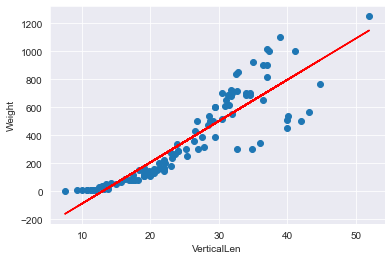

Independent variable: DiagonalLen
Slope: 27.564481236203843
R-Coefficient: 0.8071567503584482


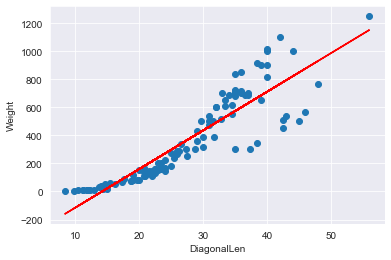

Independent variable: CrossLen
Slope: 25.520962444240723
R-Coefficient: 0.821662902921837


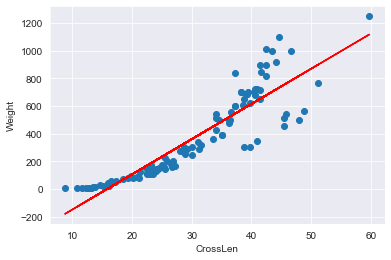

Independent variable: Height
Slope: 57.236739324999384
R-Coefficient: 0.6109836532230448


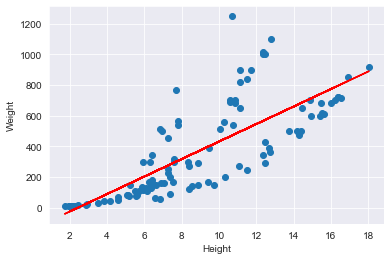

Independent variable: Width
Slope: 167.77158382823765
R-Coefficient: 0.8497451128141986


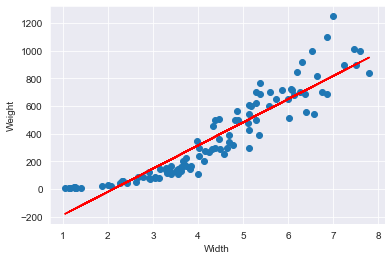

In [524]:
# function to to implement the simple linear regression model 
# on each independent variable along with the dependent variablbe
y = train_data['Weight']

# For loop to iterate through all the independent variables except the Weight and Species column
for column in train_data.columns:
    if column != 'Weight' and column!= 'Species':

        x = train_data[column]
        
        # Model fitting
        model = LinearRegression().fit(x.values.reshape(-1,1), y)
        
        # Print the slope and R coefficient
        print(f"Independent variable: {column}")
        print(f"Slope: {model.coef_[0]}")
        print(f"R-Coefficient: {model.score(x.values.reshape(-1,1), y)}")
        
        # Plotting all the graphs
        plt.scatter(x, y)
        plt.plot(x, model.predict(x.values.reshape(-1,1)), color='r')
        plt.xlabel(column)
        plt.ylabel('Weight')
        plt.show()


# Multiple Linear Regression Model

In [525]:
# Implementing Multiple Linear Regression
# Reading the train_data csv file
train_data = pd.read_csv("train.csv")

# Assigning the independent variables and dependent variables to x and y respectively
x = train_data[['VerticalLen', 'DiagonalLen', 'CrossLen','Height', 'Width']]
y = train_data['Weight']

# LinearRegression model
model = LinearRegression()

# Fitting the model
model.fit(x, y)

# Printing out all the coefficients
print(f"VerticalLen: {model.coef_[0]}")
print(f"DiagonalLen: {model.coef_[1]}")
print(f"CrossLen: {model.coef_[2]}")
print(f"Height: {model.coef_[3]}")
print(f"Width: {model.coef_[4]}")
print(f"Model Coefficients: {model.coef_}")

VerticalLen: 79.0812529017546
DiagonalLen: -20.49036551661035
CrossLen: -36.87156860149436
Height: 33.566067111151035
Width: 45.76376378689991
Model Coefficients: [ 79.0812529  -20.49036552 -36.8715686   33.56606711  45.76376379]


In [510]:
# Checking the correlation matrix to get the best independent variable for linear regression with a polynomial model
correlation_matrix = train_data.corr()
print(correlation_matrix)


               Weight  VerticalLen  DiagonalLen  CrossLen    Height     Width
Weight       1.000000     0.900876     0.905162  0.911180  0.771941  0.916947
VerticalLen  0.900876     1.000000     0.999430  0.989033  0.641947  0.882674
DiagonalLen  0.905162     0.999430     1.000000  0.991765  0.658268  0.888458
CrossLen     0.911180     0.989033     0.991765  1.000000  0.731981  0.888212
Height       0.771941     0.641947     0.658268  0.731981  1.000000  0.764605
Width        0.916947     0.882674     0.888458  0.888212  0.764605  1.000000


# Linear regression with polynomial model

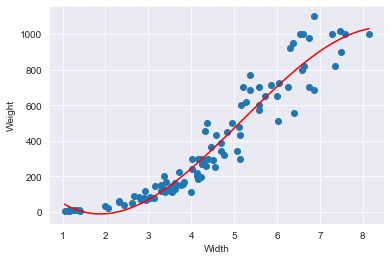

In [464]:
# Implementing linear regression with polynomial model
# Loading the training data
data = pd.read_csv('train.csv')

# Selecting the independent variable and storing it in a variable
var = data['Width']

# Creating new features
linear = var
square = var ** 2
cubic = var ** 3

# Creating a new data frame including the features
polyModel = pd.DataFrame({'linearFeature': linear, 'squareFeature': square, 'cubicFeature': cubic})

# Fitting the model
LinearModel = LinearRegression().fit(polyModel, data['Weight'])

# Predict the values
y_pred = LinearModel.predict(polyModel)

# Plotting the the results
plt.scatter(var, data['Weight'])
a = LinearModel.intercept_
b = LinearModel.coef_[0]
c = LinearModel.coef_[1]
d = LinearModel.coef_[2]

# Creating an array of x-values for the polynomial
x_values = np.linspace(min(var), max(var), 100)
# Evaluating at each x-value
y_values = a + b*x_values + c*x_values**2 + d*x_values**3

# Plotting the best fit polynomial
plt.plot(x_values, y_values, color='red')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()



# Principal Components Analysis

In [468]:
# Performing PCA on the given dataset
# Implementing Principal Components Analysis
def pca(data, normalize=True):
# Converting data
    x = data.values
# Computing mean values of columns
    mn = np.mean(x, axis=0)
# Computing difference matrix
    diff = x - mn
# Computing standard deviations of columns
    if normalize:
        sd = np.std(x, axis=0)
        diff = (x - mn) / sd
# Covariance matrix for whitened data
        cov_m = np.dot(diff.T, diff) / (x.shape[0])
    else:
        sd = np.ones(x.shape[1])
        diff = x - mn
# Covariance matrix for non-whitened data
        cov_m = np.dot(diff.T, diff) / (x.shape[0]-1)

# Normalize
    diff = diff / sd

# Compute singular value decomposition of diff
# U is for the left singular vectors
# The matrix S is for the singular values
# The matrix V is for  the right singular vectors
    U, S, V = np.linalg.svd(diff, full_matrices=False)

# Eigenvalues of covariance matrix
    eigenvalues = S**2 / (x.shape[0] - 1)

# Projected data
    projected_data = np.dot(diff, V.T)

# New dataframe for projected data
    projected_data = pd.DataFrame(projected_data, columns=data.columns)

# Return means, standard deviations, eigenvalues, eigenvectors,projected data and covariance matrix
    return mn, sd, eigenvalues, V, projected_data, cov_m

# Read data from file
data = pd.read_csv("/Users/mahvashmaghrabi/Downloads/pcatestdata.csv")
data = data[['X1', 'X2', 'X3']]

# PCA with whitening
mn, sd, eigenvalues, eigenvectors, projected_data, cov_m = pca(data, normalize=True)

print("Whitened PCA Results:")
print("Means:", mn)
print("Standard Deviations:", sd)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print("Projected Data:\n", projected_data)
print("Covariance Matrix: \n", cov_m)

# PCA without whitening
m, std, eigenvalues, eigenvectors, projected_data, cov_m = pca(data, normalize=False)
print("\nNon-Whitened PCA Results:")
print("Means:", mn)
print("Standard Deviations:", sd)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print("Projected Data:\n", projected_data)
print("Covariance Matrix: \n", cov_m)


Whitened PCA Results:
Means: [2.2  3.48 4.36]
Standard Deviations: [1.16619038 1.72904598 0.5425864 ]
Eigenvalues: [4.24683304e+00 1.33294200e+00 3.38266369e-03]
Eigenvectors: [[ 0.01008455  0.01393623  0.99985203]
 [-0.82971451 -0.55795444  0.01614547]
 [-0.55809689  0.82975456 -0.00593637]]
Projected Data:
          X1        X2        X3
0  0.457811  1.090647 -0.032173
1  1.164941 -0.641122 -0.079805
2 -1.536242 -1.631017  0.025546
3 -2.598335  1.022626  0.013730
4  2.511825  0.158867  0.072702
Covariance Matrix: 
 [[1.         0.99385201 0.01264304]
 [0.99385201 1.         0.03538854]
 [0.01264304 0.03538854 1.        ]]

Non-Whitened PCA Results:
Means: [2.2  3.48 4.36]
Standard Deviations: [1.16619038 1.72904598 0.5425864 ]
Eigenvalues: [5.42295565 0.36830813 0.01373623]
Eigenvectors: [[ 0.55824536  0.82963815  0.00791549]
 [-0.03924415  0.01687435  0.99908716]
 [-0.82874725  0.55804641 -0.04197848]]
Projected Data:
          X1        X2        X3
0 -2.228506  0.155241 -0.060508

In [470]:
# Performing PCA on the training dataset
# Loading the training data
data = pd.read_csv("train.csv")
data = data[['VerticalLen','DiagonalLen', 'CrossLen','Height','Width']]

# PCA with whitening
mn, sd, eigenvalues, eigenvectors, projected_data, cov_m = pca(data, normalize=True)

print("Whitened PCA Results:")
print("Means:", mn)
print("Standard Deviations:", sd)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print("Projected Data:\n", projected_data)
print("Covariance Matrix: \n", cov_m)

# PCA without whitening
mn, sd, eigenvalues, eigenvectors, projected_data, cov_m = pca(data, normalize=False)
print("\nNon-Whitened PCA Results:")
print("Means:", mn)
print("Standard Deviations:", sd)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print("Projected Data:\n", projected_data)
print("Covariance Matrix: \n", cov_m)

Whitened PCA Results:
Means: [24.58623853 26.63211009 29.34862385  8.72901927  4.21354495]
Standard Deviations: [ 8.79357009  9.47113317 10.44416886  4.40758453  1.71764516]
Eigenvalues: [4.07921073e-01 1.55936100e-02 4.05287066e-03 2.17256114e-05
 4.51832092e-06]
Eigenvectors: [[-0.16752329 -0.1563893  -0.14187189 -0.30478719 -0.91348534]
 [ 0.07553877  0.0560524  -0.03042663 -0.94941628  0.29805197]
 [-0.61012476 -0.54893671 -0.49965291  0.02177017  0.27620516]
 [-0.45647183 -0.25752544  0.84833301 -0.07237009  0.02019382]
 [ 0.62097592 -0.77765651  0.09810534  0.00145963  0.00353149]]
Projected Data:
      VerticalLen  DiagonalLen  CrossLen    Height     Width
0      -0.736153     0.155136  0.065834 -0.001546  0.000476
1       0.061797     0.052710  0.040882  0.008219  0.004692
2      -0.904558     0.175260  0.071673  0.001284  0.002064
3       0.508281     0.062447  0.052575  0.001310 -0.002916
4       1.083870    -0.006688 -0.021360 -0.003017  0.001647
..           ...          ..

In [471]:
# Implement multiple linear regression on the projected data
# Loading the training dataset
data = pd.read_csv("train.csv")
data = train_data[['VerticalLen','DiagonalLen', 'CrossLen','Height','Width']]

# PCA without whitening
m, std, eigenvalues, eigenvectors, projected_data, cov_matrix = pca(data, normalize=False)

# Projected data is the independent variable
X = projected_data

# Dependent variable
y = train_data['Weight']

# Linear regression model
model = LinearRegression().fit(X, y)

# Printing coefficients of the multiple linear regression model
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)
print(f"VerticalLen: {model.coef_[0]}")
print(f"DiagonalLen: {model.coef_[1]}")
print(f"CrossLen: {model.coef_[2]}")
print(f"Height: {model.coef_[3]}")
print(f"Width: {model.coef_[4]}")
print(f"Model Coefficients: {model.coef_}")


Eigenvalues: [2.92646905e+02 7.88296547e+00 5.76575157e-01 1.12536176e-01
 3.17946189e-02]
Eigenvectors: [[-0.51424229 -0.55476446 -0.61242111 -0.20927911 -0.09451929]
 [ 0.27382923  0.22647979 -0.10950766 -0.92646847 -0.05821259]
 [-0.2350108  -0.265493    0.60076159 -0.16151    -0.69805688]
 [ 0.37968312  0.21563982 -0.49760393  0.26773567 -0.70003438]
 [ 0.67910461 -0.72384821  0.06651529  0.00951646  0.10171455]]
VerticalLen: -16.82690195054828
DiagonalLen: -14.989221167689891
CrossLen: -79.94948594996106
Height: 40.87893343467158
Width: 152.4179005523065
Model Coefficients: [-16.82690195 -14.98922117 -79.94948595  40.87893343 152.41790055]


# Lasso Regression

In [472]:
# Extension - Performing Lasso Regression
# Loading the training and testing data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Splitting training data into x any y
x_train = train_data[["VerticalLen", "DiagonalLen", "CrossLen", "Height", "Width"]]
y_train = train_data["Weight"]

# Split testing data into x_test and y_test
x_test = test_data[["VerticalLen", "DiagonalLen", "CrossLen", "Height", "Width"]]
y_test = test_data["Weight"]

# Fitting the Lasso Regression model
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(x_train, y_train)

# Predicting on the test data set
y_predict = lasso.predict(x_test)

# Model Coefficients
print(f"VerticalLen: {model.coef_[0]}")
print(f"DiagonalLen: {model.coef_[1]}")
print(f"CrossLen: {model.coef_[2]}")
print(f"Height: {model.coef_[3]}")
print(f"Width: {model.coef_[4]}")
print(f"Model Coefficients: {model.coef_}")



VerticalLen: -16.82690195054828
DiagonalLen: -14.989221167689891
CrossLen: -79.94948594996106
Height: 40.87893343467158
Width: 152.4179005523065
Model Coefficients: [-16.82690195 -14.98922117 -79.94948595  40.87893343 152.41790055]


# Ridge Regression

In [473]:
# Extension - Performing Ridge Regression
# Loading the training and testing data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Splitting training data into x_train any y_train
x_train = train_data[["VerticalLen", "DiagonalLen", "CrossLen", "Height", "Width"]]
y_train = train_data["Weight"]

# Split testing data into x_test and y_test
X_test = test_data[["VerticalLen", "DiagonalLen", "CrossLen", "Height", "Width"]]
y_test = test_data["Weight"]

# Ridge Regression model
ridge = Ridge(alpha=0.1)

# Fitting the model
ridge.fit(X_train, y_train)

# Predicting on the test data set
y_pred = ridge.predict(X_test)

# Model Coefficients
print(f"VerticalLen: {model.coef_[0]}")
print(f"DiagonalLen: {model.coef_[1]}")
print(f"CrossLen: {model.coef_[2]}")
print(f"Height: {model.coef_[3]}")
print(f"Width: {model.coef_[4]}")
print(f"Model Coefficients: {model.coef_}")

VerticalLen: -16.82690195054828
DiagonalLen: -14.989221167689891
CrossLen: -79.94948594996106
Height: 40.87893343467158
Width: 152.4179005523065
Model Coefficients: [-16.82690195 -14.98922117 -79.94948595  40.87893343 152.41790055]
